# Stima $R_t$

La stima di $R_t$ è effettuata mediante il modello semplificato **RKI**

https://covid19.infn.it/sommario/rt-info.html

In [1]:
import matplotlib.pyplot as plt

from aidam.math_utils import moving_function_rev1
#from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, auto_grid_shape
#import pickle as pkl
import numpy as np
from covid_lib import read_covid_data, find_day_index

## Lettura dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 379
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2021-03-08T17:00:00


## Costanti e parametri

In [3]:
end_day=len(giorni)-1
start_day=end_day-120


regione='Toscana'

print('Rt sarà stimato per %s dal %s al %s'%(regione,giorni[start_day][0:10],giorni[end_day][0:10]))

Rt sarà stimato per Toscana dal 2020-11-08 al 2021-03-08


## Calcolo modello KRI

In [4]:
numero_giorni=end_day-start_day

kdays=4

# estendo le regioni con l'Italia
regioni_plus=list(regioni)
regioni_plus.append('Italia')
regioni_plus=np.asarray(regioni_plus)

In [5]:
rt={}
for regione in regioni_plus:
    rt[regione]=np.zeros(numero_giorni)
    for i,day in enumerate(range(start_day,end_day)):
        temp1=trend['totale_positivi'][regione][day-kdays:day]
        temp2=trend['totale_positivi'][regione][day-2*kdays:day-kdays]
        rt[regione][i]=np.sum(temp1)/np.sum(temp2)    

### Plot in grid di tutte le regioni

In [6]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)

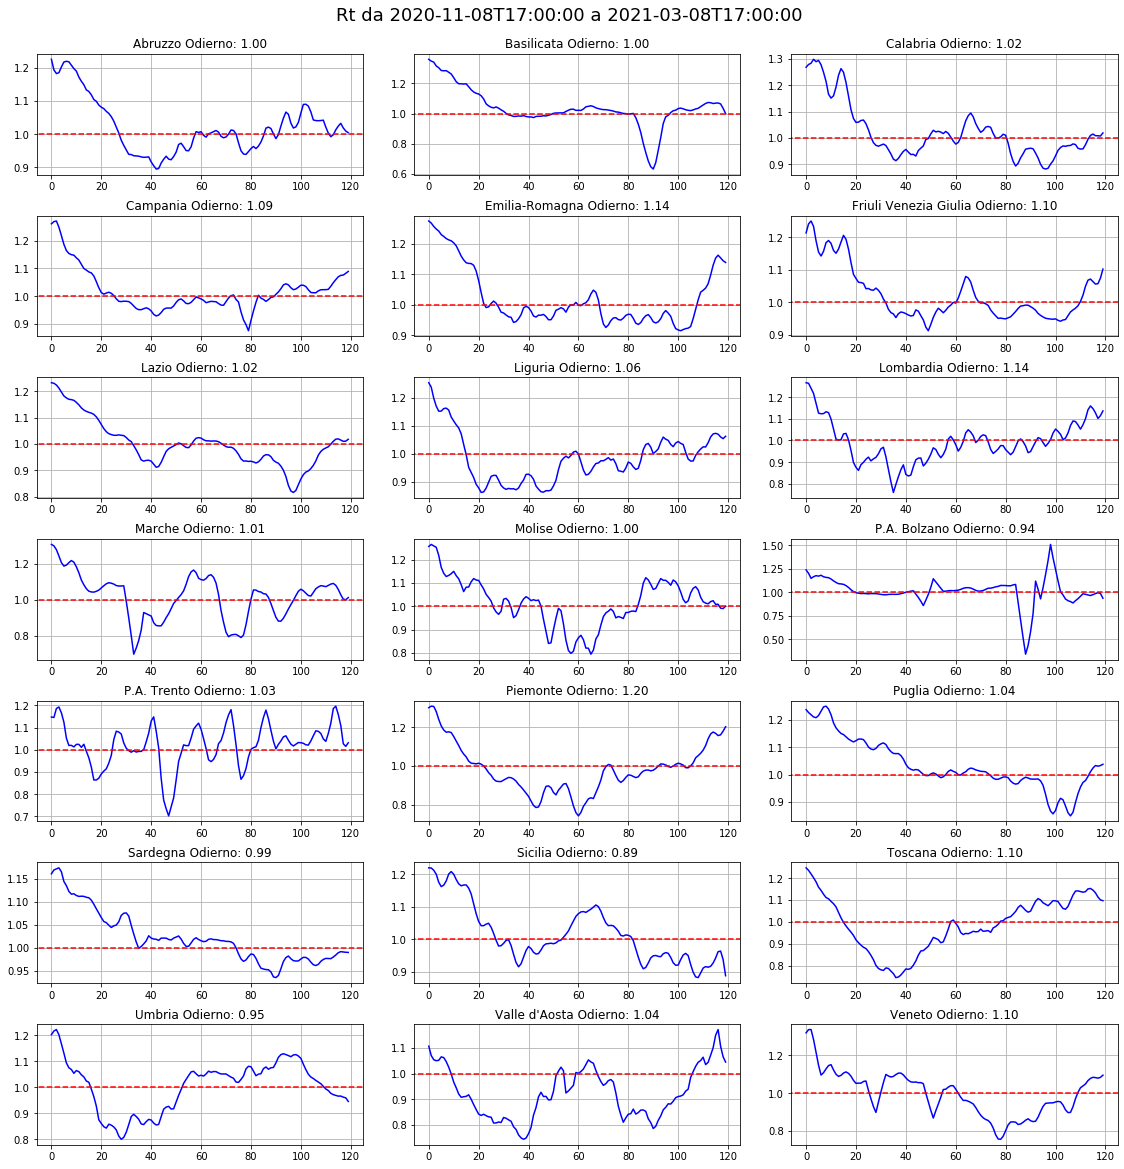

In [7]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('Rt da %s a %s'%(giorni[start_day],giorni[end_day]), y=1.02,fontsize=18)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(rt[regione],'b-',linewidth=1.5)
    ax[grid_seq[i]].set_title(regione+' Odierno: %.2f'%rt[regione][-1])
    ax[grid_seq[i]].axhline(1,-0.5,numero_giorni,c='r', ls='--')
    #ax[grid_seq[i]].legend()
    ax[grid_seq[i]].grid()

### Plot regioni specifiche

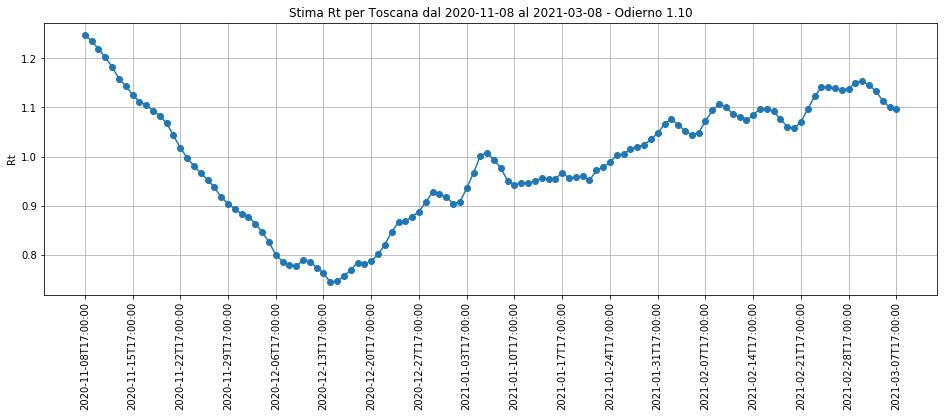

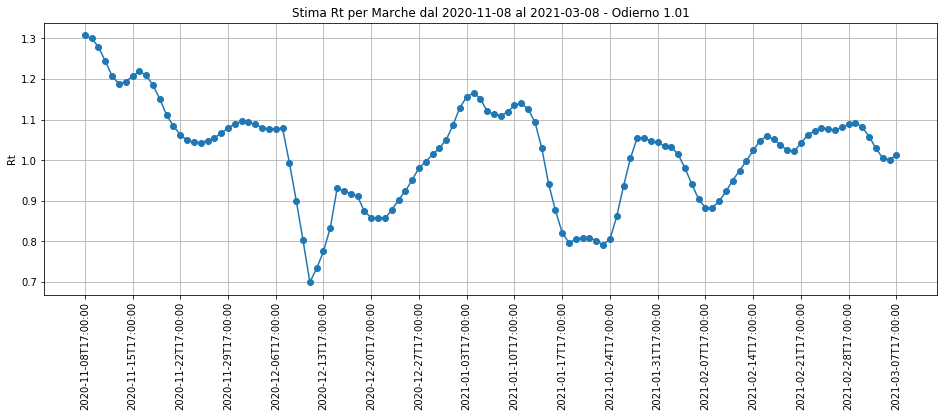

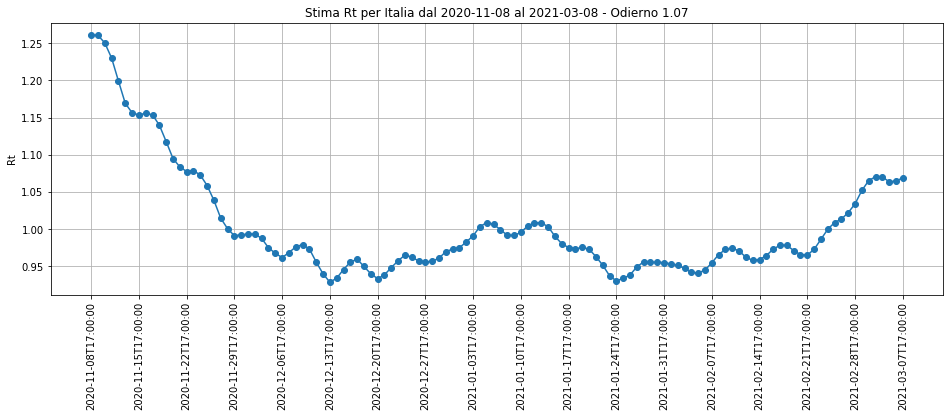

In [8]:
regioni_selected=['Toscana','Marche','Italia']

for regione in regioni_selected:

    fig,ax=plt.subplots(1,figsize=(16,5))
    ax.plot(rt[regione],marker='o')
    #ax.plot(moving_function_rev1(rt,np.mean,6,6),color='red',linestyle='--',linewidth=3)
    ax.set_title('Stima Rt per %s dal %s al %s - Odierno %.2f'%(regione,giorni[start_day][0:10],giorni[end_day][0:10],rt[regione][-1]))
    ax.set_xticks(list(range(0,numero_giorni,7)))
    ax.set_xticklabels(giorni[list(range(start_day,end_day,7))],rotation=90)
    ax.set_ylabel('Rt')
    ax.grid()

## Bar charts fra regioni

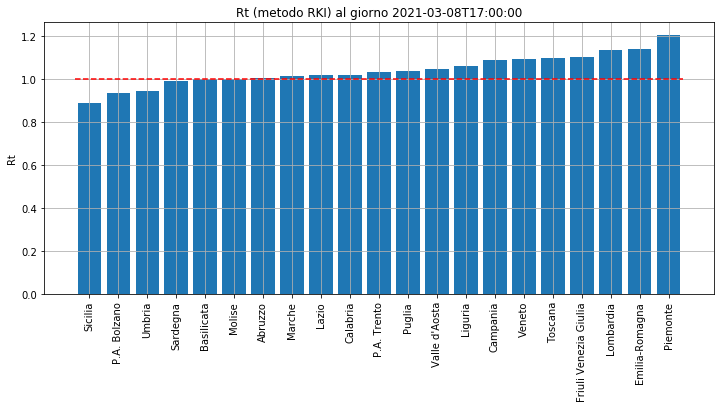

In [9]:
valori=np.array([rt[r][-1] for r in regioni])
ordine=np.argsort(valori)

plt.figure(figsize=(12,5))
plt.title('Rt (metodo RKI) al giorno %s'%giorni[-1])
plt.bar(range(len(regioni)),valori[ordine])
plt.hlines(1,-0.5,20.5,colors='r', linestyles='--')
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Rt')
plt.grid()
plt.show()


## Heatmap

In [10]:
import seaborn as sns
import pandas as pd

In [11]:
rt_df=pd.DataFrame(rt)

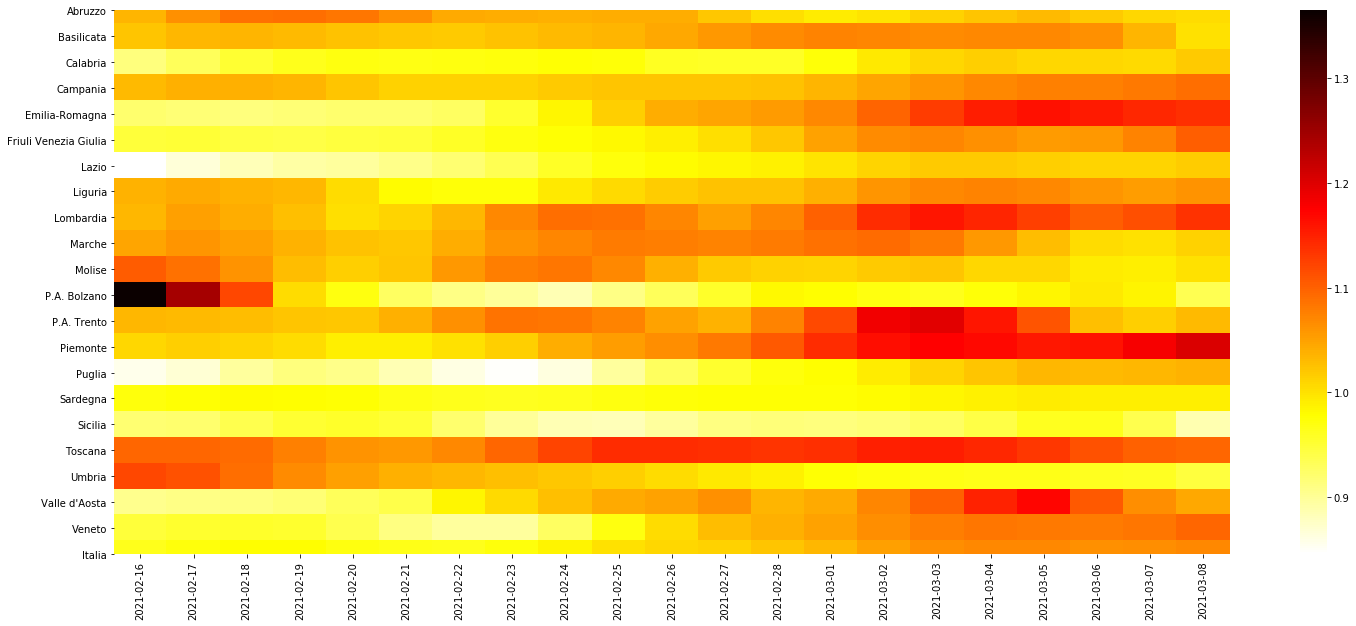

In [18]:
last_days=21

giorni_labels=[g[0:10] for g in giorni[-last_days:]]

fig, ax = plt.subplots(figsize=(25,10)) 
sns.heatmap(rt_df.iloc[-last_days:].transpose(),ax=ax,cmap='hot_r',xticklabels=giorni_labels)

## Tendenza

Differenza in $R_t$ negli ultimi giorni per le varie regioni

In [13]:
giorni_tendenza=14

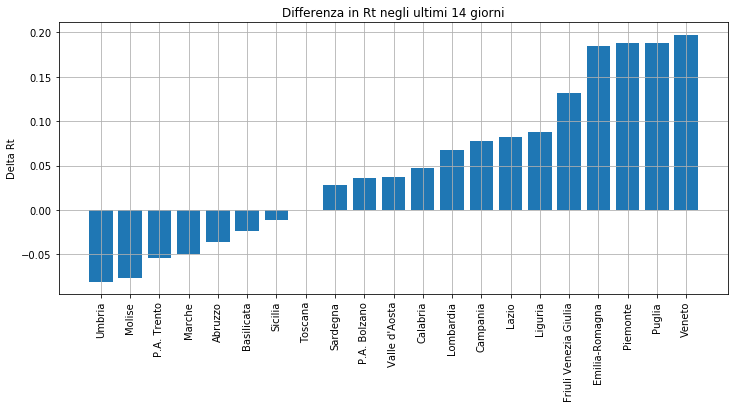

In [14]:
tendenza=np.array([rt[r][-1]-rt[r][-giorni_tendenza] for r in regioni])
ordine=np.argsort(tendenza)

plt.figure(figsize=(12,5))
plt.title('Differenza in Rt negli ultimi %d giorni'%giorni_tendenza)
plt.bar(range(len(regioni)),tendenza[ordine])
plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
plt.ylabel('Delta Rt')
plt.grid()
plt.show()

#### Salvataggio Rt su file esterno 

In [15]:
import pandas as pd

In [16]:
rt_df=pd.DataFrame(rt,index=[x[0:10] for x in giorni[start_day:end_day]])
rt_df.to_excel('rt_regioni.xls')

In [17]:
rt_df.tail()

,Abruzzo,Basilicata,Calabria,Campania,Emilia-Romagna,Friuli Venezia Giulia,Lazio,Liguria,Lombardia,Marche,...,P.A. Trento,Piemonte,Puglia,Sardegna,Sicilia,Toscana,Umbria,Valle d'Aosta,Veneto,Italia
2021-03-03,1.024043,1.069240,1.014794,1.069943,1.153333,1.063995,1.019596,1.073083,1.147191,1.058270,...,1.159327,1.169242,1.023867,0.989704,0.942648,1.145297,0.966553,1.148673,1.084248,1.070634
2021-03-04,1.032297,1.070473,1.008653,1.075024,1.162895,1.056367,1.015152,1.070068,1.127440,1.028961,...,1.109874,1.157667,1.033168,0.992041,0.962058,1.132945,0.966769,1.171030,1.082640,1.070472
2021-03-05,1.018546,1.064052,1.008420,1.076204,1.154040,1.057627,1.010268,1.060119,1.101433,1.004944,...,1.027385,1.161462,1.030861,0.991284,0.964015,1.113358,0.962613,1.106489,1.079630,1.063633
2021-03-06,1.009284,1.034950,1.007376,1.082449,1.144670,1.074556,1.010994,1.054160,1.114012,1.000975,...,1.015467,1.180543,1.032910,0.990645,0.938296,1.100472,0.960070,1.065391,1.083891,1.064928
2021-03-07,1.004009,1.000184,1.019079,1.089251,1.138972,1.102362,1.018044,1.062337,1.136120,1.013210,...,1.031632,1.203581,1.037732,0.990338,0.888253,1.096756,0.946076,1.044684,1.095374,1.068937
